## Setup for reproducible results

In [1]:
import os
import random

os.environ['PYTHONHASHSEED']=str(1)

SEED = 20

def seed_rnd(SEED):
    os.environ['PYTHONHASHSEED']=str(SEED)
    random.seed(SEED)
    np.random.RandomState(SEED)
    tf.random.set_seed(SEED)

## Import dependencies

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Read file with train data

In [3]:
input_file = "CompareColocation.csv"

train_data = pd.read_csv(input_file)
train_data

,NAM 1 Hum,NAM 2 Hum,NAM 1 Temp,NAM 2 Temp,Luftdaten Hum,Luftdaten Temp,Luftdaten PM10,Luftdaten PM2.5,Reference PM10,Reference PM2.5
0,32.98,29.52,22.44,24.35,25.24,33.03,6.144583,1.817083,37.3,12.4
1,29.13,27.58,23.75,25.11,26.95,29.98,4.992609,1.788261,36.3,10.8
2,29.48,28.70,24.26,25.40,32.90,25.45,6.684167,1.894167,30.1,10.2
3,28.76,28.01,24.17,25.25,32.92,25.35,5.489130,1.889565,33.1,11.1
4,27.21,27.12,25.75,26.10,33.55,25.32,5.492500,1.811250,34.9,11.2
...,...,...,...,...,...,...,...,...,...,...
8779,89.46,94.57,20.45,19.72,99.90,19.24,NaN,NaN,34.0,30.2
8780,81.89,92.20,22.03,20.78,99.90,20.62,NaN,NaN,33.1,28.1
8781,70.47,83.17,25.05,22.73,96.53,25.18,NaN,NaN,31.3,22.3
8782,60.90,72.81,27.05,25.11,65.98,34.66,NaN,NaN,36.8,20.1


## Remove unnecessary data

In [4]:
del train_data["NAM 1 Temp"]
del train_data["NAM 2 Temp"]
del train_data["Luftdaten Hum"]
del train_data["Luftdaten Temp"]
del train_data["Luftdaten PM2.5"]
del train_data["Reference PM2.5"]
train_data

,NAM 1 Hum,NAM 2 Hum,Luftdaten PM10,Reference PM10
0,32.98,29.52,6.144583,37.3
1,29.13,27.58,4.992609,36.3
2,29.48,28.70,6.684167,30.1
3,28.76,28.01,5.489130,33.1
4,27.21,27.12,5.492500,34.9
...,...,...,...,...
8779,89.46,94.57,NaN,34.0
8780,81.89,92.20,NaN,33.1
8781,70.47,83.17,NaN,31.3
8782,60.90,72.81,NaN,36.8


## Remove rows without data from all sensors

In [5]:
train_data.replace('', np.nan, inplace=True)
train_data.dropna(inplace=True)
train_data

,NAM 1 Hum,NAM 2 Hum,Luftdaten PM10,Reference PM10
0,32.98,29.52,6.144583,37.3
1,29.13,27.58,4.992609,36.3
2,29.48,28.70,6.684167,30.1
3,28.76,28.01,5.489130,33.1
4,27.21,27.12,5.492500,34.9
...,...,...,...,...
8755,82.87,87.06,18.667273,20.8
8756,82.67,88.92,18.261739,22.4
8757,81.74,90.18,15.597391,28.2
8758,69.58,82.91,12.154348,25.8


## Calculate mean humidity values

In [6]:
train_data["Average Hum"] = (train_data["NAM 1 Hum"] + train_data["NAM 2 Hum"]) / 2

train_data

,NAM 1 Hum,NAM 2 Hum,Luftdaten PM10,Reference PM10,Average Hum
0,32.98,29.52,6.144583,37.3,31.250
1,29.13,27.58,4.992609,36.3,28.355
2,29.48,28.70,6.684167,30.1,29.090
3,28.76,28.01,5.489130,33.1,28.385
4,27.21,27.12,5.492500,34.9,27.165
...,...,...,...,...,...
8755,82.87,87.06,18.667273,20.8,84.965
8756,82.67,88.92,18.261739,22.4,85.795
8757,81.74,90.18,15.597391,28.2,85.960
8758,69.58,82.91,12.154348,25.8,76.245


## Remove unnecessary data

In [7]:
del train_data["NAM 1 Hum"]
del train_data["NAM 2 Hum"]

train_data

,Luftdaten PM10,Reference PM10,Average Hum
0,6.144583,37.3,31.250
1,4.992609,36.3,28.355
2,6.684167,30.1,29.090
3,5.489130,33.1,28.385
4,5.492500,34.9,27.165
...,...,...,...
8755,18.667273,20.8,84.965
8756,18.261739,22.4,85.795
8757,15.597391,28.2,85.960
8758,12.154348,25.8,76.245


## Shuffle data

In [8]:
# Seed the random number generators
seed_rnd(SEED)

train_data = train_data.sample(frac=1, random_state=SEED).reset_index(drop=True)
train_data

,Luftdaten PM10,Reference PM10,Average Hum
0,14.527826,43.4,55.920
1,7.201818,13.8,66.480
2,7.210417,17.6,70.125
3,8.384783,20.2,57.355
4,12.364545,20.7,73.945
...,...,...,...
7195,10.334167,22.4,60.715
7196,5.468750,41.4,27.660
7197,30.267273,19.8,94.355
7198,34.049583,34.7,74.375


## Select data to train the model

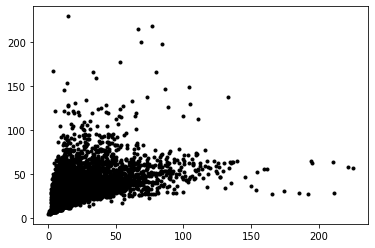

In [9]:
# Select x values
x_values = train_data.iloc[:,[0,2]].copy()

# Select y values
y_values = train_data["Reference PM10"]

# Plot data
plt.plot(x_values["Luftdaten PM10"], y_values, "k.")
plt.show()

## Split data for training, validation and testing

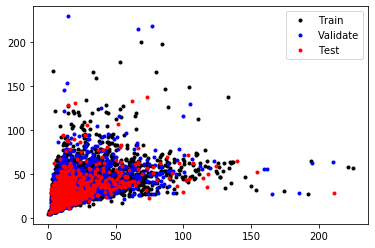

In [10]:
SAMPLES = train_data.shape[0]

# 65% for training
TRAIN_SPLIT = int(0.65 * SAMPLES)
# 25% for testing (so next division at 65% + 25% = 90%)
TEST_SPLIT = int(0.25 * SAMPLES + TRAIN_SPLIT)

# Store new data sets
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Plot
plt.plot(x_train["Luftdaten PM10"], y_train, "k.", label="Train")
plt.plot(x_validate["Luftdaten PM10"], y_validate, "b.", label="Validate")
plt.plot(x_test["Luftdaten PM10"], y_test, "r.", label="Test")
plt.legend()
plt.show()

## Define the ML model

In [11]:
from tensorflow.keras import layers

model = tf.keras.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape=(2,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1))

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


## Train the ML model

In [12]:
history = model.fit(x_train, y_train, epochs=250, batch_size=32, validation_data=(x_validate, y_validate))

Epoch 1/250
147/147 [==============================] - 0s 2ms/step - loss: 474.8057 - mae: 15.7326 - val_loss: 416.3959 - val_mae: 14.2911
Epoch 2/250
147/147 [==============================] - 0s 748us/step - loss: 366.4254 - mae: 13.7498 - val_loss: 411.3249 - val_mae: 13.9147
Epoch 3/250
147/147 [==============================] - 0s 748us/step - loss: 360.7992 - mae: 13.5577 - val_loss: 401.6857 - val_mae: 13.9892
Epoch 4/250
147/147 [==============================] - 0s 680us/step - loss: 353.0240 - mae: 13.4025 - val_loss: 405.8348 - val_mae: 13.4998
Epoch 5/250
147/147 [==============================] - 0s 680us/step - loss: 347.5172 - mae: 13.2111 - val_loss: 391.1598 - val_mae: 13.3767
Epoch 6/250
147/147 [==============================] - 0s 680us/step - loss: 341.3651 - mae: 13.0511 - val_loss: 394.7281 - val_mae: 13.1680
Epoch 7/250
147/147 [==============================] - 0s 680us/step - loss: 334.7366 - mae: 12.8304 - val_loss: 373.8152 - val_mae: 13.2967
Epoch 8/250
147

147/147 [==============================] - 0s 680us/step - loss: 154.8185 - mae: 8.0210 - val_loss: 167.5305 - val_mae: 7.4890
Epoch 60/250
147/147 [==============================] - 0s 748us/step - loss: 154.4490 - mae: 8.0172 - val_loss: 165.9729 - val_mae: 7.8485
Epoch 61/250
147/147 [==============================] - 0s 687us/step - loss: 153.2728 - mae: 7.9660 - val_loss: 165.4569 - val_mae: 7.8728
Epoch 62/250
147/147 [==============================] - 0s 748us/step - loss: 153.5109 - mae: 7.9397 - val_loss: 167.4389 - val_mae: 7.5637
Epoch 63/250
147/147 [==============================] - 0s 748us/step - loss: 154.3798 - mae: 7.9852 - val_loss: 169.6438 - val_mae: 7.5231
Epoch 64/250
147/147 [==============================] - 0s 680us/step - loss: 152.4808 - mae: 7.9392 - val_loss: 167.4914 - val_mae: 7.4851
Epoch 65/250
147/147 [==============================] - 0s 816us/step - loss: 153.0991 - mae: 7.9737 - val_loss: 163.3372 - val_mae: 7.7498
Epoch 66/250
147/147 [===========

147/147 [==============================] - 0s 748us/step - loss: 141.7420 - mae: 7.7532 - val_loss: 173.8969 - val_mae: 7.8429
Epoch 118/250
147/147 [==============================] - 0s 816us/step - loss: 141.2341 - mae: 7.7326 - val_loss: 169.7326 - val_mae: 7.7187
Epoch 119/250
147/147 [==============================] - 0s 748us/step - loss: 140.6221 - mae: 7.7276 - val_loss: 166.9435 - val_mae: 7.7179
Epoch 120/250
147/147 [==============================] - 0s 748us/step - loss: 139.6945 - mae: 7.7602 - val_loss: 172.9921 - val_mae: 7.8310
Epoch 121/250
147/147 [==============================] - 0s 748us/step - loss: 141.0257 - mae: 7.7346 - val_loss: 151.7795 - val_mae: 7.7193
Epoch 122/250
147/147 [==============================] - 0s 680us/step - loss: 138.8388 - mae: 7.7079 - val_loss: 152.2988 - val_mae: 7.6572
Epoch 123/250
147/147 [==============================] - 0s 748us/step - loss: 140.4478 - mae: 7.7492 - val_loss: 150.8693 - val_mae: 7.4767
Epoch 124/250
147/147 [====

147/147 [==============================] - 0s 680us/step - loss: 135.5745 - mae: 7.7472 - val_loss: 188.8707 - val_mae: 8.5476
Epoch 176/250
147/147 [==============================] - 0s 680us/step - loss: 136.5481 - mae: 7.8074 - val_loss: 150.3450 - val_mae: 7.4203
Epoch 177/250
147/147 [==============================] - 0s 612us/step - loss: 136.1331 - mae: 7.7788 - val_loss: 158.8082 - val_mae: 7.5165
Epoch 178/250
147/147 [==============================] - 0s 748us/step - loss: 135.7471 - mae: 7.7546 - val_loss: 160.9189 - val_mae: 7.6223
Epoch 179/250
147/147 [==============================] - 0s 748us/step - loss: 134.7134 - mae: 7.7669 - val_loss: 159.7865 - val_mae: 8.2930
Epoch 180/250
147/147 [==============================] - 0s 748us/step - loss: 135.4902 - mae: 7.7727 - val_loss: 145.8873 - val_mae: 7.4291
Epoch 181/250
147/147 [==============================] - 0s 680us/step - loss: 135.4348 - mae: 7.7630 - val_loss: 232.4378 - val_mae: 11.4720
Epoch 182/250
147/147 [===

147/147 [==============================] - 0s 884us/step - loss: 134.4767 - mae: 7.7234 - val_loss: 146.7372 - val_mae: 7.4670
Epoch 234/250
147/147 [==============================] - 0s 884us/step - loss: 133.5811 - mae: 7.7449 - val_loss: 145.2717 - val_mae: 7.5445
Epoch 235/250
147/147 [==============================] - 0s 952us/step - loss: 134.7950 - mae: 7.7856 - val_loss: 148.0544 - val_mae: 7.7911
Epoch 236/250
147/147 [==============================] - 0s 680us/step - loss: 134.6649 - mae: 7.7970 - val_loss: 157.5155 - val_mae: 8.5571
Epoch 237/250
147/147 [==============================] - 0s 748us/step - loss: 133.6744 - mae: 7.8435 - val_loss: 155.7117 - val_mae: 7.5268
Epoch 238/250
147/147 [==============================] - 0s 748us/step - loss: 134.6353 - mae: 7.7677 - val_loss: 145.7458 - val_mae: 7.4584
Epoch 239/250
147/147 [==============================] - 0s 816us/step - loss: 133.8499 - mae: 7.7656 - val_loss: 152.3027 - val_mae: 7.3927
Epoch 240/250
147/147 [====

## Output analysis

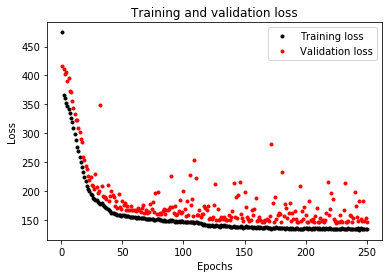

In [13]:
def graph_loss(model_history, skip=0):
  loss = model_history.history["loss"]
  val_loss = model_history.history["val_loss"]

  epochs = range(1, len(loss) + 1)

  plt.plot(epochs[skip:], loss[skip:], "k.", label = "Training loss")
  plt.plot(epochs[skip:], val_loss[skip:], "r.", label = "Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

graph_loss(history)

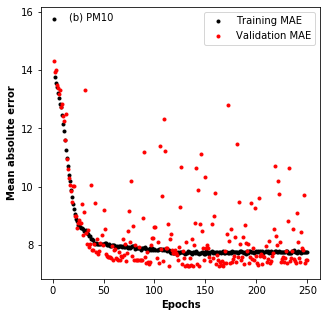

In [14]:
mae = history.history["mae"]
val_mae = history.history["val_mae"]
epochs = range(1, len(mae) + 1)
skip = 0

fig, ax1 = plt.subplots(1, 1, figsize=(5,5))

ax1.plot(epochs[skip:], mae[skip:], "k.", label = "Training MAE")
ax1.plot(epochs[skip:], val_mae[skip:], "r.", label = "Validation MAE")
text_pos_x = 0.10
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(b) PM10", transform=ax1.transAxes)
ax1.set_xlabel("Epochs", fontweight="bold")
ax1.set_ylabel("Mean absolute error", fontweight="bold")
ax1.legend(loc='upper right')

plt.savefig("Complementation_ML_training_MAE_PM10.png")
plt.show()

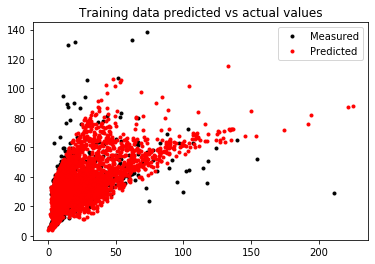

In [15]:
def graph_quality(model):
  predictions = model.predict(x_train)

  plt.clf()
  plt.title("Training data predicted vs actual values")
  plt.plot(x_test["Luftdaten PM10"], y_test, "k.", label="Measured")
  plt.plot(x_train["Luftdaten PM10"], predictions, "r.", label="Predicted")
  plt.legend()
  plt.show()

graph_quality(model)

## Test trained model

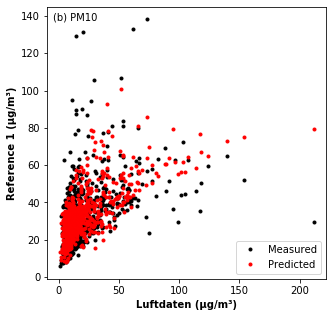

In [16]:
predictions = model.predict(x_test)

fig, ax1 = plt.subplots(1, 1, figsize=(5,5))

ax1.plot(x_test["Luftdaten PM10"], y_test, "k.", label="Measured")
ax1.plot(x_test["Luftdaten PM10"], predictions, "r.", label="Predicted")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(b) PM10", transform=ax1.transAxes)
ax1.set_xlabel("Luftdaten (µg/m³)", fontweight="bold")
ax1.set_ylabel("Reference 1 (µg/m³)", fontweight="bold")
ax1.legend(loc='lower right')

plt.savefig("Complementation_ML_training_PM10.png")
plt.show()

In [17]:
output_MAE = "Mean absolute errors for PM10\n\
Measured data:,{0:.1f}\n\
Predicted data:,{1:.1f}".format(mean_absolute_error(y_test, x_test["Luftdaten PM10"]),
                            mean_absolute_error(predictions, x_test["Luftdaten PM10"]))

print(output_MAE.replace(","," "))
print()
output_MSE = "Mean squared errors for PM10\n\
Measured data:,{0:.1f}\n\
Predicted data:,{1:.1f}".format(mean_squared_error(y_test, x_test["Luftdaten PM10"]),
                            mean_squared_error(predictions, x_test["Luftdaten PM10"]))

print(output_MSE.replace(","," "))

Mean absolute errors for PM10
Measured data: 17.4
Predicted data: 16.5

Mean squared errors for PM10
Measured data: 575.3
Predicted data: 391.0


## Import data from sensors

In [18]:
input_file = "CompareComplementation.csv"

data = pd.read_csv(input_file)
data

,NAM 1 Hum BME280,NAM 1 Hum SHT30,NAM 2 Hum BME280,NAM 2 Hum SHT30,NAM 1 Temp BME280,NAM 1 Temp SHT30,NAM 2 Temp BME280,NAM 2 Temp SHT30,Luftdaten 1 PM10,Luftdaten 2 PM10,...,Luftdaten 1 PM2.5,Luftdaten 2 PM2.5,NAM 1 PM2.5,NAM 2 PM2.5,Reference 1 PM10,Reference 2 PM10,Reference 3 PM10,Reference 1 PM2.5,Reference 2 PM2.5,Reference 3 PM2.5
0,32.98,35.59,29.52,32.98,22.44,22.62,24.35,24.25,2.68,10.27,...,1.76,4.84,1.52,2.49,37.3,10.7,13.3,12.4,2.4,3.9
1,29.13,31.28,27.58,30.53,23.75,24.13,25.11,25.16,2.82,6.03,...,1.62,3.09,1.23,2.46,36.3,11.3,16.5,10.8,2.0,3.1
2,29.48,31.67,28.70,32.03,24.26,24.49,25.40,25.27,2.76,6.36,...,1.66,3.36,1.30,1.98,30.1,9.9,20.4,10.2,1.5,3.3
3,28.76,31.13,28.01,31.30,24.17,24.33,25.25,25.00,2.12,9.83,...,1.52,5.66,1.28,3.35,33.1,12.3,10.6,11.1,1.9,2.7
4,27.21,29.69,27.12,30.23,25.75,25.76,26.10,25.88,2.12,2.30,...,1.52,0.93,1.30,1.04,34.9,13.1,12.8,11.2,1.8,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,89.46,85.31,94.57,67.04,20.45,20.58,19.72,25.03,27.61,19.37,...,25.00,13.79,16.25,11.45,34.0,24.4,25.2,30.2,19.7,19.7
8780,81.89,78.67,92.20,64.60,22.03,22.36,20.78,25.86,23.26,18.63,...,21.05,12.93,15.94,12.51,33.1,18.8,19.3,28.1,14.8,14.9
8781,70.47,69.35,83.17,61.38,25.05,25.35,22.73,27.14,18.68,15.48,...,17.02,10.87,13.49,11.55,31.3,17.2,15.6,22.3,13.1,11.1
8782,60.90,61.44,72.81,59.39,27.05,27.34,25.11,27.46,14.55,12.36,...,13.27,8.72,10.95,9.86,36.8,15.1,14.8,20.1,10.7,9.5


## Remove unnecessary data

In [19]:
del data["NAM 1 Hum SHT30"]
del data["NAM 2 Hum SHT30"]
del data["NAM 1 Temp BME280"]
del data["NAM 1 Temp SHT30"]
del data["NAM 2 Temp BME280"]
del data["NAM 2 Temp SHT30"]
del data["Luftdaten 1 PM2.5"]
del data["Luftdaten 2 PM2.5"]
del data["NAM 1 PM2.5"]
del data["NAM 2 PM2.5"]
del data["Reference 1 PM2.5"]
del data["Reference 2 PM2.5"]
del data["Reference 3 PM2.5"]
data

,NAM 1 Hum BME280,NAM 2 Hum BME280,Luftdaten 1 PM10,Luftdaten 2 PM10,NAM 1 PM10,NAM 2 PM10,Reference 1 PM10,Reference 2 PM10,Reference 3 PM10
0,32.98,29.52,2.68,10.27,2.86,5.07,37.3,10.7,13.3
1,29.13,27.58,2.82,6.03,2.36,4.79,36.3,11.3,16.5
2,29.48,28.70,2.76,6.36,2.53,4.02,30.1,9.9,20.4
3,28.76,28.01,2.12,9.83,1.90,6.65,33.1,12.3,10.6
4,27.21,27.12,2.12,2.30,2.87,2.73,34.9,13.1,12.8
...,...,...,...,...,...,...,...,...,...
8779,89.46,94.57,27.61,19.37,18.02,14.87,34.0,24.4,25.2
8780,81.89,92.20,23.26,18.63,17.63,16.83,33.1,18.8,19.3
8781,70.47,83.17,18.68,15.48,14.91,14.81,31.3,17.2,15.6
8782,60.90,72.81,14.55,12.36,12.33,12.53,36.8,15.1,14.8


## Remove rows without data from all sensors

In [20]:
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)
data

,NAM 1 Hum BME280,NAM 2 Hum BME280,Luftdaten 1 PM10,Luftdaten 2 PM10,NAM 1 PM10,NAM 2 PM10,Reference 1 PM10,Reference 2 PM10,Reference 3 PM10
0,32.98,29.52,2.68,10.27,2.86,5.07,37.3,10.7,13.3
1,29.13,27.58,2.82,6.03,2.36,4.79,36.3,11.3,16.5
2,29.48,28.70,2.76,6.36,2.53,4.02,30.1,9.9,20.4
3,28.76,28.01,2.12,9.83,1.90,6.65,33.1,12.3,10.6
4,27.21,27.12,2.12,2.30,2.87,2.73,34.9,13.1,12.8
...,...,...,...,...,...,...,...,...,...
8779,89.46,94.57,27.61,19.37,18.02,14.87,34.0,24.4,25.2
8780,81.89,92.20,23.26,18.63,17.63,16.83,33.1,18.8,19.3
8781,70.47,83.17,18.68,15.48,14.91,14.81,31.3,17.2,15.6
8782,60.90,72.81,14.55,12.36,12.33,12.53,36.8,15.1,14.8


## Calculate mean values of PM10

In [21]:
data["Reference PM10"] = (data["Reference 2 PM10"] + data["Reference 1 PM10"]
                        + data["Reference 3 PM10"]) / 3
data

,NAM 1 Hum BME280,NAM 2 Hum BME280,Luftdaten 1 PM10,Luftdaten 2 PM10,NAM 1 PM10,NAM 2 PM10,Reference 1 PM10,Reference 2 PM10,Reference 3 PM10,Reference PM10
0,32.98,29.52,2.68,10.27,2.86,5.07,37.3,10.7,13.3,20.433333
1,29.13,27.58,2.82,6.03,2.36,4.79,36.3,11.3,16.5,21.366667
2,29.48,28.70,2.76,6.36,2.53,4.02,30.1,9.9,20.4,20.133333
3,28.76,28.01,2.12,9.83,1.90,6.65,33.1,12.3,10.6,18.666667
4,27.21,27.12,2.12,2.30,2.87,2.73,34.9,13.1,12.8,20.266667
...,...,...,...,...,...,...,...,...,...,...
8779,89.46,94.57,27.61,19.37,18.02,14.87,34.0,24.4,25.2,27.866667
8780,81.89,92.20,23.26,18.63,17.63,16.83,33.1,18.8,19.3,23.733333
8781,70.47,83.17,18.68,15.48,14.91,14.81,31.3,17.2,15.6,21.366667
8782,60.90,72.81,14.55,12.36,12.33,12.53,36.8,15.1,14.8,22.233333


## Remove unnecessary data

In [22]:
del data["Reference 1 PM10"]
del data["Reference 2 PM10"]
del data["Reference 3 PM10"]
data

,NAM 1 Hum BME280,NAM 2 Hum BME280,Luftdaten 1 PM10,Luftdaten 2 PM10,NAM 1 PM10,NAM 2 PM10,Reference PM10
0,32.98,29.52,2.68,10.27,2.86,5.07,20.433333
1,29.13,27.58,2.82,6.03,2.36,4.79,21.366667
2,29.48,28.70,2.76,6.36,2.53,4.02,20.133333
3,28.76,28.01,2.12,9.83,1.90,6.65,18.666667
4,27.21,27.12,2.12,2.30,2.87,2.73,20.266667
...,...,...,...,...,...,...,...
8779,89.46,94.57,27.61,19.37,18.02,14.87,27.866667
8780,81.89,92.20,23.26,18.63,17.63,16.83,23.733333
8781,70.47,83.17,18.68,15.48,14.91,14.81,21.366667
8782,60.90,72.81,14.55,12.36,12.33,12.53,22.233333


## Apply ML model to results from Luftdaten and NAM devices

In [23]:
data_ML = data.copy()
data_ML.reset_index(drop=True, inplace=True)

# Apply ML model to the Luftdaten 1 data
input_data = data_ML.iloc[:,[2,0]].copy()   # Select PM10 and Hum columns
predictions = model.predict(input_data)
predictions = pd.Series(predictions.T[0], name="Luftdaten 1 ML PM10")   # Convert output to DataFrame
data_ML = pd.concat([data_ML, predictions], axis=1)

# Apply ML model to the NAM 1 data
input_data = data_ML.iloc[:,[4,0]].copy()   # Select PM10 and Hum columns
predictions = model.predict(input_data)
predictions = pd.Series(predictions.T[0], name="NAM 1 ML PM10")   # Convert output to DataFrame
data_ML = pd.concat([data_ML, predictions], axis=1)

# Apply ML model to the Luftdaten 2 data
input_data = data_ML.iloc[:,[3,1]].copy()   # Select PM10 and Hum columns
predictions = model.predict(input_data)
predictions = pd.Series(predictions.T[0], name="Luftdaten 2 ML PM10")   # Convert output to DataFrame
data_ML = pd.concat([data_ML, predictions], axis=1)

# Apply ML model to the NAM 2 data
input_data = data_ML.iloc[:,[5,1]].copy()   # Select PM10 and Hum columns
predictions = model.predict(input_data)
predictions = pd.Series(predictions.T[0], name="NAM 2 ML PM10")   # Convert output to DataFrame
data_ML = pd.concat([data_ML, predictions], axis=1)

data_ML

,NAM 1 Hum BME280,NAM 2 Hum BME280,Luftdaten 1 PM10,Luftdaten 2 PM10,NAM 1 PM10,NAM 2 PM10,Reference PM10,Luftdaten 1 ML PM10,NAM 1 ML PM10,Luftdaten 2 ML PM10,NAM 2 ML PM10
0,32.98,29.52,2.68,10.27,2.86,5.07,20.433333,27.988829,28.204615,41.967434,32.109608
1,29.13,27.58,2.82,6.03,2.36,4.79,21.366667,29.553789,29.002329,34.159180,32.477947
2,29.48,28.70,2.76,6.36,2.53,4.02,20.133333,29.354849,29.079123,33.986294,31.148411
3,28.76,28.01,2.12,9.83,1.90,6.65,18.666667,28.848883,28.585148,42.211365,35.183083
4,27.21,27.12,2.12,2.30,2.87,2.73,20.266667,29.411366,30.310476,29.659813,30.175304
...,...,...,...,...,...,...,...,...,...,...,...
5826,89.46,94.57,27.61,19.37,18.02,14.87,27.866667,20.647676,21.843851,16.871588,17.432844
5827,81.89,92.20,23.26,18.63,17.63,16.83,23.733333,28.306765,28.162191,19.191893,19.416391
5828,70.47,83.17,18.68,15.48,14.91,14.81,21.366667,33.565166,29.045603,25.120230,24.317022
5829,60.90,72.81,14.55,12.36,12.33,12.53,22.233333,32.086899,29.425529,25.139456,25.343256


### Comparison between Luftdaten and NAM for PM10

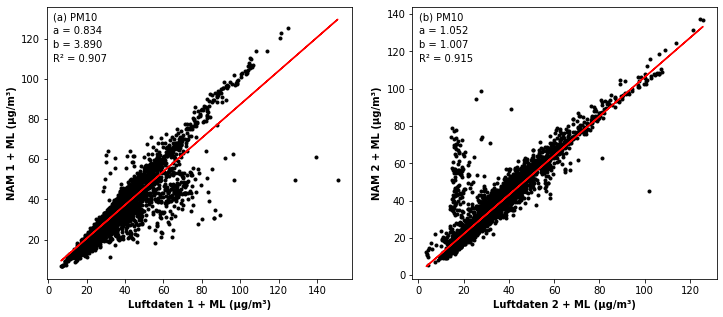

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

x = data_ML["Luftdaten 1 ML PM10"]
y = data_ML["NAM 1 ML PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax1.plot(x, y, "k.")
ax1.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM10", transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax1.transAxes)
ax1.set_xlabel("Luftdaten 1 + ML (µg/m³)", fontweight="bold")
ax1.set_ylabel("NAM 1 + ML (µg/m³)", fontweight="bold")

x = data_ML["Luftdaten 2 ML PM10"]
y = data_ML["NAM 2 ML PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax2.plot(x, y, "k.")
ax2.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) PM10", transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax2.transAxes)
ax2.set_xlabel("Luftdaten 2 + ML (µg/m³)", fontweight="bold")
ax2.set_ylabel("NAM 2 + ML (µg/m³)", fontweight="bold")

plt.savefig("Complementation_LC+ML_regressions_PM10.png")
plt.show()

### Scatter plots with linear regressions for PM10

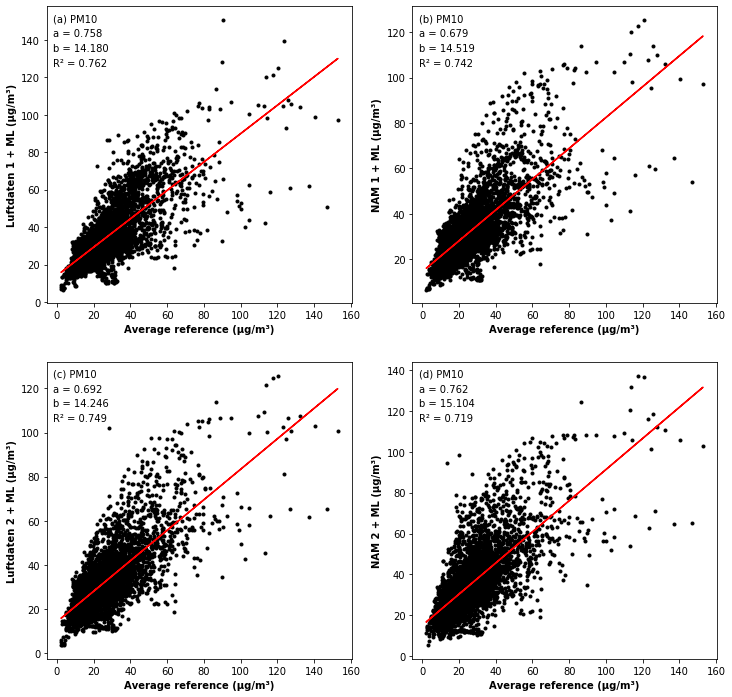

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))

x = data_ML["Reference PM10"]
y = data_ML["Luftdaten 1 ML PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax1.plot(x, y, "k.")
ax1.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM10", transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax1.transAxes)
ax1.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax1.set_ylabel("Luftdaten 1 + ML (µg/m³)", fontweight="bold")

y = data_ML["NAM 1 ML PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax2.plot(x, y, "k.")
ax2.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) PM10", transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax2.transAxes)
ax2.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax2.set_ylabel("NAM 1 + ML (µg/m³)", fontweight="bold")

y = data_ML["Luftdaten 2 ML PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax3.plot(x, y, "k.")
ax3.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax3.text(text_pos_x, text_pos_y, "(c) PM10", transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax3.transAxes)
ax3.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax3.set_ylabel("Luftdaten 2 + ML (µg/m³)", fontweight="bold")

y = data_ML["NAM 2 ML PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax4.plot(x, y, "k.")
ax4.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax4.text(text_pos_x, text_pos_y, "(d) PM10", transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax4.transAxes)
ax4.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax4.set_ylabel("NAM 2 + ML (µg/m³)", fontweight="bold")

plt.savefig("Complementation_ML_regressions_PM10.png")
plt.show()

### Remove unnecessary data

In [26]:
del data_ML["NAM 1 PM10"]
del data_ML["Luftdaten 1 PM10"]
del data_ML["NAM 2 PM10"]
del data_ML["Luftdaten 2 PM10"]
del data_ML["NAM 1 Hum BME280"]
del data_ML["NAM 2 Hum BME280"]

### Reorder columns

In [27]:
col_order = ["Luftdaten 1 ML PM10","NAM 1 ML PM10", "Luftdaten 2 ML PM10", "NAM 2 ML PM10",
             "Reference PM10"]

data_ML = data_ML[col_order].copy()
data_ML

,Luftdaten 1 ML PM10,NAM 1 ML PM10,Luftdaten 2 ML PM10,NAM 2 ML PM10,Reference PM10
0,27.988829,28.204615,41.967434,32.109608,20.433333
1,29.553789,29.002329,34.159180,32.477947,21.366667
2,29.354849,29.079123,33.986294,31.148411,20.133333
3,28.848883,28.585148,42.211365,35.183083,18.666667
4,29.411366,30.310476,29.659813,30.175304,20.266667
...,...,...,...,...,...
5826,20.647676,21.843851,16.871588,17.432844,27.866667
5827,28.306765,28.162191,19.191893,19.416391,23.733333
5828,33.565166,29.045603,25.120230,24.317022,21.366667
5829,32.086899,29.425529,25.139456,25.343256,22.233333


### Configure output file

In [28]:
def add_empty_line(filename):
    with open(filename,'a') as file:
        file.write("\n")

def add_text(filename, text):
    with open(filename,'a') as file:
        file.write(text + "\n")

def add_separator(filename):
    with open(filename,'a') as file:
        file.write("##########\n\n")

def clear_file(filename):
    with open(filename,'w') as file:
        file.write("")

comment = "Data description"

output_file = "ResultsComplementation_ML_PM10.csv"
clear_file(output_file)
add_separator(output_file)
add_text(output_file, comment)
add_empty_line(output_file)

### Pearson correlations for PM10

In [29]:
result = data_ML.corr(method="pearson").round(3)
add_text(output_file, "Pearson correlations for PM10 + ML")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten 1 ML PM10,NAM 1 ML PM10,Luftdaten 2 ML PM10,NAM 2 ML PM10,Reference PM10
Luftdaten 1 ML PM10,1.000,0.907,0.882,0.867,0.762
NAM 1 ML PM10,0.907,1.000,0.953,0.928,0.742
Luftdaten 2 ML PM10,0.882,0.953,1.000,0.915,0.749
NAM 2 ML PM10,0.867,0.928,0.915,1.000,0.719
Reference PM10,0.762,0.742,0.749,0.719,1.000


### Mean absolute errors for PM10

In [30]:
output_MAE = "Mean absolute errors\n\
Luftdaten 1:,{0:.1f}\n\
Luftdaten 1 + ML:,{1:.1f}\n\
NAM 1:,{2:.1f}\n\
NAM 1 + ML:,{3:.1f}\n\
Luftdaten 2:,{4:.1f}\n\
Luftdaten 2 + ML:,{5:.1f}\n\
NAM 2:,{6:.1f}\n\
NAM 2 + ML:,{7:.1f}".format(mean_absolute_error(data["Reference PM10"], data["Luftdaten 1 PM10"]),
                            mean_absolute_error(data_ML["Reference PM10"], data_ML["Luftdaten 1 ML PM10"]),
                            mean_absolute_error(data["Reference PM10"], data["NAM 1 PM10"]),
                            mean_absolute_error(data_ML["Reference PM10"], data_ML["NAM 1 ML PM10"]),
                            mean_absolute_error(data["Reference PM10"], data["Luftdaten 2 PM10"]),
                            mean_absolute_error(data_ML["Reference PM10"], data_ML["Luftdaten 2 ML PM10"]),
                            mean_absolute_error(data["Reference PM10"], data["NAM 2 PM10"]),
                            mean_absolute_error(data_ML["Reference PM10"], data_ML["NAM 2 ML PM10"]))

add_text(output_file, "Mean absolute errors for PM10")
add_text(output_file, output_MAE)
add_empty_line(output_file)

print(output_MAE.replace(","," "))

Mean absolute errors
Luftdaten 1: 15.0
Luftdaten 1 + ML: 10.4
NAM 1: 11.9
NAM 1 + ML: 9.2
Luftdaten 2: 11.2
Luftdaten 2 + ML: 9.3
NAM 2: 13.3
NAM 2 + ML: 11.3


### Mean squared errors for PM10

In [31]:
output_MSE = "Mean squared errors\n\
Luftdaten 1:,{0:.1f}\n\
Luftdaten 1 + ML:,{1:.1f}\n\
NAM 1:,{2:.1f}\n\
NAM 1 + ML:,{3:.1f}\n\
Luftdaten 2:,{4:.1f}\n\
Luftdaten 2 + ML:,{5:.1f}\n\
NAM 2:,{6:.1f}\n\
NAM 2 + ML:,{7:.1f}".format(mean_squared_error(data["Reference PM10"], data["Luftdaten 1 PM10"]),
                            mean_squared_error(data_ML["Reference PM10"], data_ML["Luftdaten 1 ML PM10"]),
                            mean_squared_error(data["Reference PM10"], data["NAM 1 PM10"]),
                            mean_squared_error(data_ML["Reference PM10"], data_ML["NAM 1 ML PM10"]),
                            mean_squared_error(data["Reference PM10"], data["Luftdaten 2 PM10"]),
                            mean_squared_error(data_ML["Reference PM10"], data_ML["Luftdaten 2 ML PM10"]),
                            mean_squared_error(data["Reference PM10"], data["NAM 2 PM10"]),
                            mean_squared_error(data_ML["Reference PM10"], data_ML["NAM 2 ML PM10"]))

add_text(output_file, "Mean squared errors for PM10")
add_text(output_file, output_MSE)
add_empty_line(output_file)
add_separator(output_file)

print(output_MSE.replace(","," "))

Mean squared errors
Luftdaten 1: 552.1
Luftdaten 1 + ML: 162.4
NAM 1: 249.8
NAM 1 + ML: 139.4
Luftdaten 2: 231.3
Luftdaten 2 + ML: 137.6
NAM 2: 428.8
NAM 2 + ML: 206.0


## Visualization of the ML influence
### Luftdaten 1

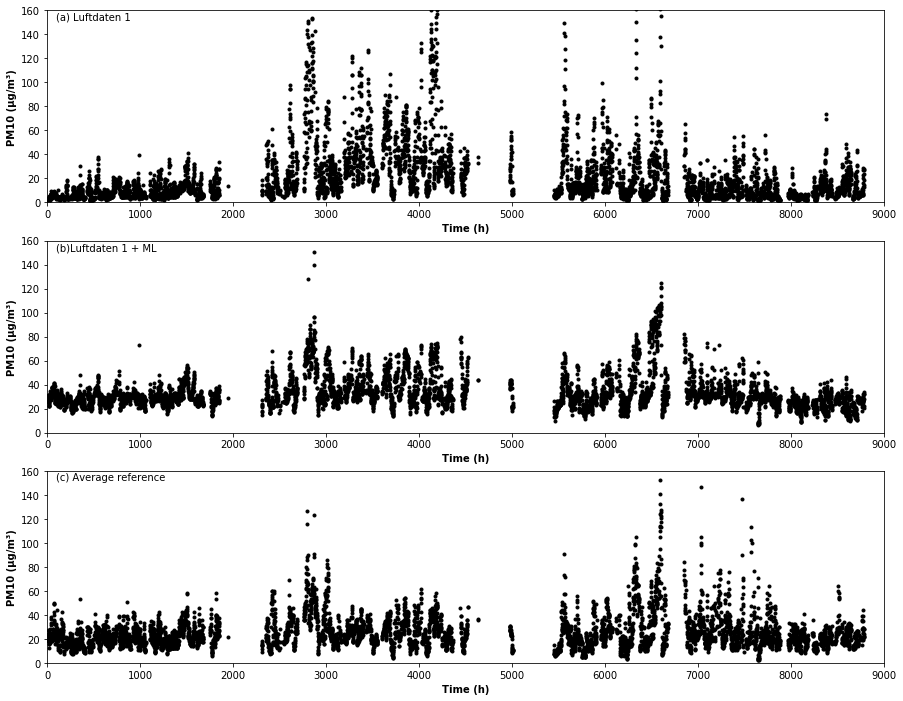

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,12))

x = data.index
y1 = data["Luftdaten 1 PM10"]
y2 = data_ML["Luftdaten 1 ML PM10"]
y3 = data_ML["Reference PM10"]

ax1.plot(x, y1, "k.")
ax1.set_xlabel("Time (h)", fontweight="bold")
ax1.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) Luftdaten 1", transform=ax1.transAxes)
ax1.set_xlim([0, 9000])
ax1.set_ylim([0, 160])

ax2.plot(x, y2, "k.")
ax2.set_xlabel("Time (h)", fontweight="bold")
ax2.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b)Luftdaten 1 + ML", transform=ax2.transAxes)
ax2.set_xlim([0, 9000])
ax2.set_ylim([0, 160])

ax3.plot(x, y3, "k.")
ax3.set_xlabel("Time (h)", fontweight="bold")
ax3.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax3.text(text_pos_x, text_pos_y, "(c) Average reference", transform=ax3.transAxes)
ax3.set_xlim([0, 9000])
ax3.set_ylim([0, 160])

plt.savefig("Complementation_ML_Luftdaten1_PM10.png")
plt.show()

### NAM 1

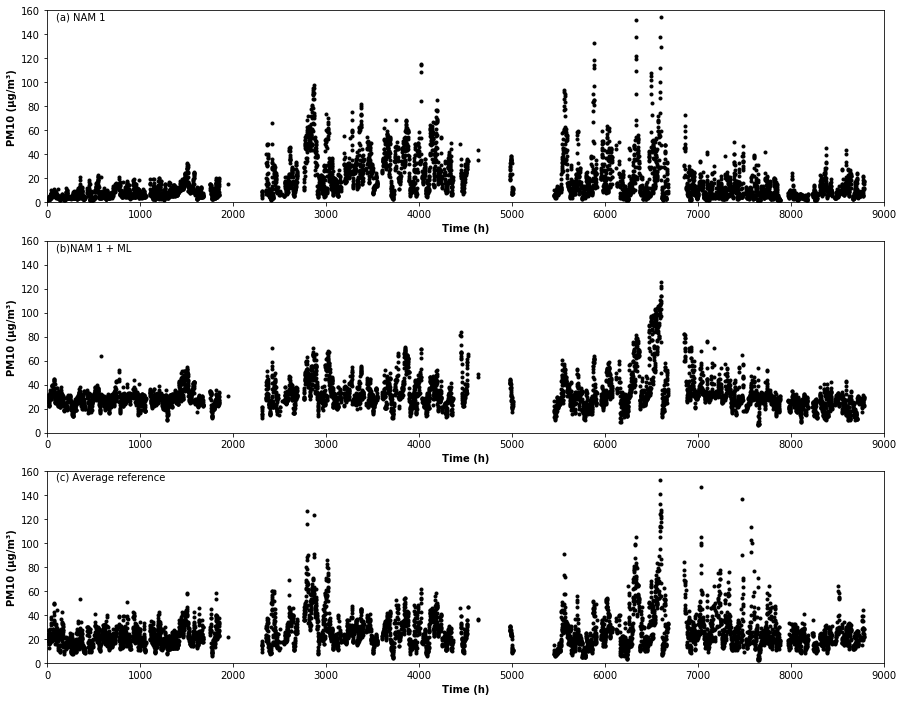

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,12))

x = data.index
y1 = data["NAM 1 PM10"]
y2 = data_ML["NAM 1 ML PM10"]
y3 = data_ML["Reference PM10"]

ax1.plot(x, y1, "k.")
ax1.set_xlabel("Time (h)", fontweight="bold")
ax1.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) NAM 1", transform=ax1.transAxes)
ax1.set_xlim([0, 9000])
ax1.set_ylim([0, 160])

ax2.plot(x, y2, "k.")
ax2.set_xlabel("Time (h)", fontweight="bold")
ax2.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b)NAM 1 + ML", transform=ax2.transAxes)
ax2.set_xlim([0, 9000])
ax2.set_ylim([0, 160])

ax3.plot(x, y3, "k.")
ax3.set_xlabel("Time (h)", fontweight="bold")
ax3.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax3.text(text_pos_x, text_pos_y, "(c) Average reference", transform=ax3.transAxes)
ax3.set_xlim([0, 9000])
ax3.set_ylim([0, 160])

plt.savefig("Complementation_ML_NAM1_PM10.png")
plt.show()

### Luftdaten 2

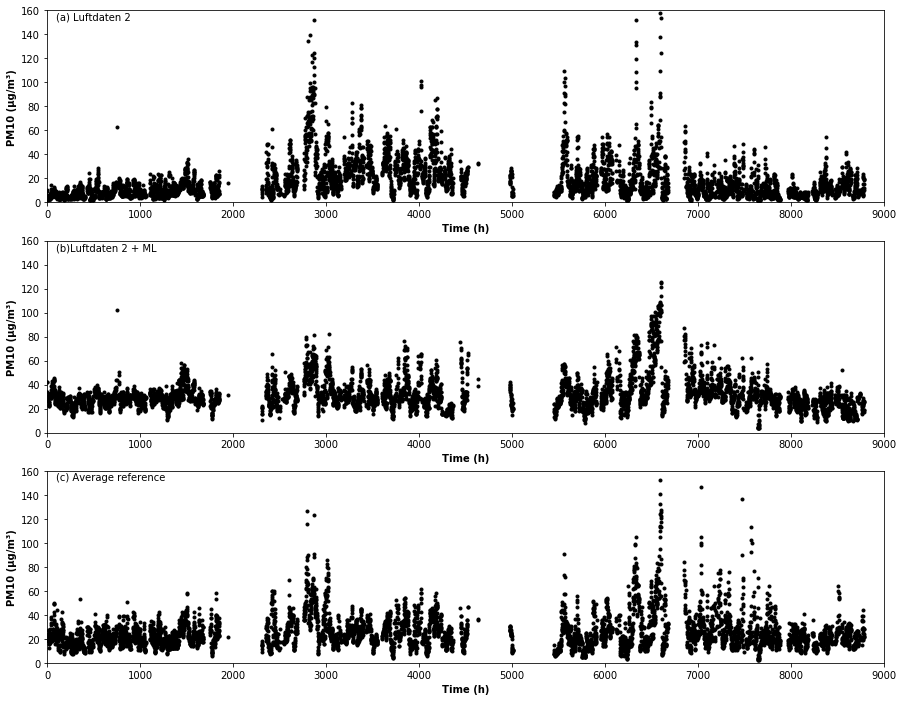

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,12))

x = data.index
y1 = data["Luftdaten 2 PM10"]
y2 = data_ML["Luftdaten 2 ML PM10"]
y3 = data_ML["Reference PM10"]

ax1.plot(x, y1, "k.")
ax1.set_xlabel("Time (h)", fontweight="bold")
ax1.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) Luftdaten 2", transform=ax1.transAxes)
ax1.set_xlim([0, 9000])
ax1.set_ylim([0, 160])

ax2.plot(x, y2, "k.")
ax2.set_xlabel("Time (h)", fontweight="bold")
ax2.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b)Luftdaten 2 + ML", transform=ax2.transAxes)
ax2.set_xlim([0, 9000])
ax2.set_ylim([0, 160])

ax3.plot(x, y3, "k.")
ax3.set_xlabel("Time (h)", fontweight="bold")
ax3.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax3.text(text_pos_x, text_pos_y, "(c) Average reference", transform=ax3.transAxes)
ax3.set_xlim([0, 9000])
ax3.set_ylim([0, 160])

plt.savefig("Complementation_ML_Luftdaten2_PM10.png")
plt.show()

### NAM 2

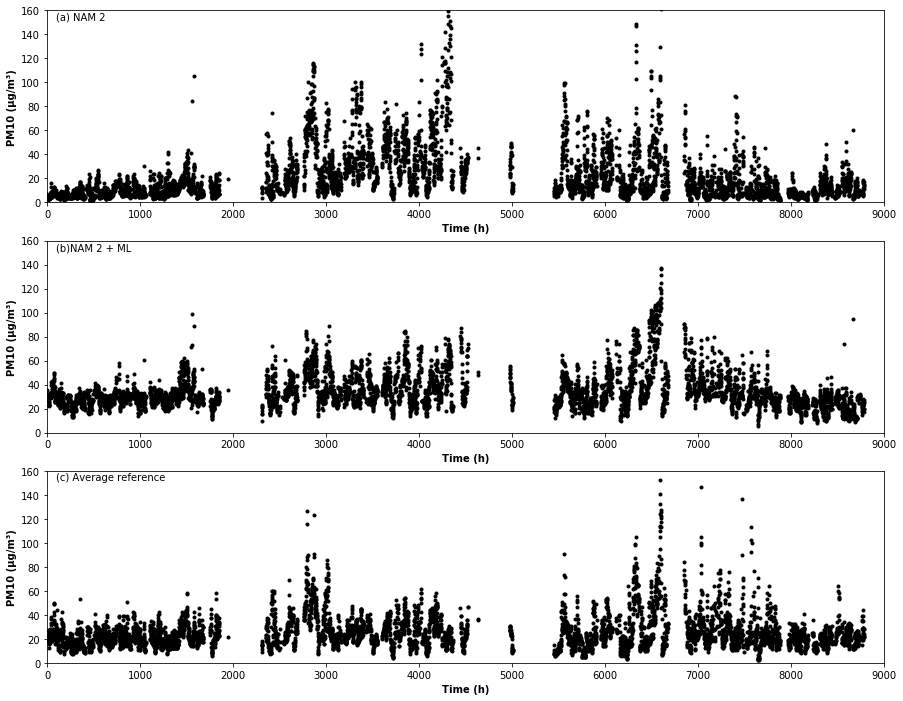

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,12))

x = data.index
y1 = data["NAM 2 PM10"]
y2 = data_ML["NAM 2 ML PM10"]
y3 = data_ML["Reference PM10"]

ax1.plot(x, y1, "k.")
ax1.set_xlabel("Time (h)", fontweight="bold")
ax1.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) NAM 2", transform=ax1.transAxes)
ax1.set_xlim([0, 9000])
ax1.set_ylim([0, 160])

ax2.plot(x, y2, "k.")
ax2.set_xlabel("Time (h)", fontweight="bold")
ax2.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b)NAM 2 + ML", transform=ax2.transAxes)
ax2.set_xlim([0, 9000])
ax2.set_ylim([0, 160])

ax3.plot(x, y3, "k.")
ax3.set_xlabel("Time (h)", fontweight="bold")
ax3.set_ylabel("PM10 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax3.text(text_pos_x, text_pos_y, "(c) Average reference", transform=ax3.transAxes)
ax3.set_xlim([0, 9000])
ax3.set_ylim([0, 160])

plt.savefig("Complementation_ML_NAM2_PM10.png")
plt.show()